In [3]:
from ultralytics import YOLO

model = YOLO('/home/maelic/Documents/training_/yolov8l_200/weights/best.pt')

image_path = "/home/maelic/Documents/Datasets/VG/VG_100K"
# take a random image
import os
import random
import cv2

image_path = os.path.join(image_path, random.choice(os.listdir(image_path)))
image = cv2.imread(image_path)
print(type(image))
res=model.predict(
   source=image,
   conf=0.5,
   save=False,
)

<class 'numpy.ndarray'>

0: 640x480 1 child, 1 couch, 1 person, 77.0ms
Speed: 1.9ms preprocess, 77.0ms inference, 35.7ms postprocess per image at shape (1, 3, 640, 480)


In [4]:
from ultralytics.nn.tasks import DetectionModel
from ultralytics import YOLO

detect_model = YOLO('yolov8l.yaml')

from ultralytics.nn.tasks import attempt_load_one_weight
from ultralytics.cfg import get_cfg

weights = "/home/maelic/Documents/training_/yolov8l_200/weights/best.pt"
detect_model.model, ckpt = attempt_load_one_weight(weights)
detect_model.task = detect_model.model.args["task"]

args = get_cfg(overrides={'model': weights})
detect_model.model.args = args

In [5]:
from ultralytics.models.yolo.detect import DetectionPredictor

predictor = DetectionPredictor(args)

res = predictor(image, model=detect_model.model)


Ultralytics YOLOv8.1.19 🚀 Python-3.11.5 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 16117MiB)
Model summary (fused): 268 layers, 43706838 parameters, 0 gradients, 165.4 GFLOPs
0: 640x480 1 child, 1 couch, 1 hair, 1 jacket, 1 person, 1 shirt, 2 teddy bears, 19.3ms
Speed: 1.4ms preprocess, 19.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/train


In [7]:
from ultralytics.yolo.data.augment import LetterBox
import numpy as np

image_path = "/home/maelic/Documents/Datasets/VG/VG_100K"
# take a random image
import os
import random
import cv2
img_path = os.path.join(image_path, random.choice(os.listdir(image_path)))
# read image in RGB format
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def prepare_input(image, input_shape=(640,640), stride=32, auto=True):
    input_tensor = LetterBox(input_shape, auto=auto, stride=stride)(image=image)
    input_tensor = input_tensor.transpose((2, 0, 1))[::-1]  # HWC to CHW, BGR to RGB
    input_tensor = np.ascontiguousarray(input_tensor).astype(np.float32)  # contiguous
    input_tensor /= 255.0  # 0 - 255 to 0.0 - 1.0
    input_tensor = input_tensor[None].astype(np.float32)
    return input_tensor

processed_image = prepare_input(image, (640,640), 32, True)

import torch
processed_image = torch.from_numpy(processed_image).to(torch.device('cuda'))
# Change image floating point precision if fp16 set to true
processed_image =processed_image.float()

res = detect_model(processed_image, save=True)


0: 448x640 2 bowls, 1 candle, 1 curtain, 3 jars, 4 plants, 1 pot, 4 vases, 2 windows, 80.4ms
Speed: 0.0ms preprocess, 80.4ms inference, 7.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict4



0: 640x448 1 chair, 1 wall, 1 window, 90.8ms
Speed: 1.4ms preprocess, 90.8ms inference, 24.5ms postprocess per image at shape (1, 3, 640, 448)


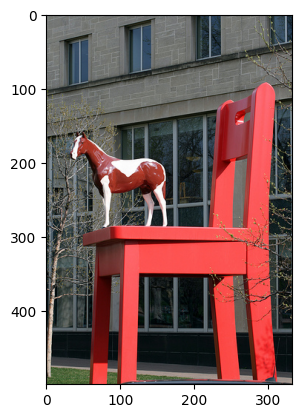

In [13]:
import torch

detect_model.model.to('cuda')
detect_model.model.eval()
# inputs = batch of 32 images

image_path = "/home/maelic/Documents/PhD/Datasets/VisualGenome/VG_100K"
# take a random image
import os
import random
import cv2
img_path = os.path.join(image_path, random.choice(os.listdir(image_path)))
# read image in RGB format
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# show image
import matplotlib.pyplot as plt
plt.imshow(image)
# inputs = torch.rand(32, 3, 512, 640).to('cuda')
# print(inputs.shape)
# img = preprocess([image], detect_model.model)
outputs = detect_model(image)

In [ ]:
print(outputs)

(tensor([[[9.6305e+00, 1.0742e+01, 1.4121e+01,  ..., 5.2992e+02, 5.4066e+02, 5.5092e+02],
         [7.8681e+00, 8.0479e+00, 7.6312e+00,  ..., 6.2050e+02, 6.2135e+02, 6.2204e+02],
         [1.6813e+01, 2.0553e+01, 2.3224e+01,  ..., 2.1726e+02, 1.9584e+02, 1.7747e+02],
         ...,
         [7.7439e-07, 1.5550e-07, 2.9102e-07,  ..., 3.5366e-05, 1.5556e-04, 8.8732e-04],
         [1.4040e-08, 3.4763e-09, 1.0346e-07,  ..., 7.6515e-06, 1.1855e-05, 3.2111e-05],
         [1.3831e-07, 3.0863e-08, 7.3619e-08,  ..., 2.5401e-04, 2.8238e-04, 2.5943e-04]]], device='cuda:0'), [tensor([[[[ 45.2382,  10.8837,   5.3095,  ...,   9.8010,  10.2586,   2.5465],
          [ 40.7826,  13.8279,   3.8085,  ...,   1.9779,   4.0124,   1.2951],
          [ 33.0618,  10.6675,   0.6706,  ...,  -4.0258,  -2.4959,  -1.6236],
          ...,
          [ 35.7202,  17.7945,  49.8697,  ...,  -6.8880,  -4.7588,  -1.0447],
          [ 45.1408,  13.5237,  24.1013,  ...,  -6.6334,   0.0602,   1.3866],
          [ 51.0835,  11.

In [ ]:
print(len(outputs[0]))
print(outputs[0].shape)

1
torch.Size([1, 134, 8400])


In [ ]:
from ultralytics.utils import ops

preds = ops.non_max_suppression(outputs[0], 0.99)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


300
torch.Size([300, 6])


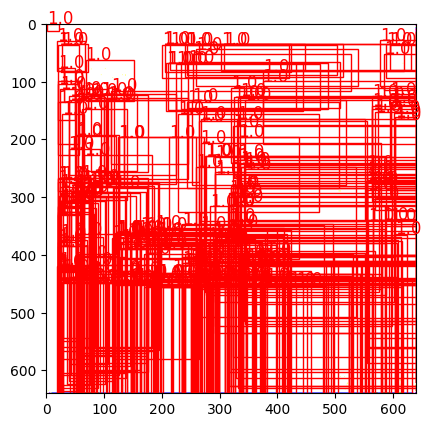

In [ ]:
print(len(preds[0]))
print(preds[0].shape)

# show the preds
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(1)
ax.imshow(image[0].cpu().permute(1, 2, 0).numpy())
# pred to cpu
preds = preds[0].cpu().numpy()
for pred in preds:
    x, y, w, h, conf, cls = pred
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.text(x, y, f"{conf}", fontsize=12, color='r')